 

<center>April to March Temperatures in Khanka, Uzbekistan. (2020-2021)<center/>

# Data Acquisition 
    
Create a directory for the DATA, and move the data.txt file containing the urls for the data to be downloaded into the DATA directory.

In [1]:
!ls

DATA            Tmax_Tmin.ipynb


In [2]:
#! mkdir DATA
#! mv data.txt "DATA"

In [3]:
%cd "DATA"
!ls 

/Users/aacaste1/Merra_Practice/Uzbekistan/Tmax_Tmin/DATA
MERRA2_400.statD_2d_slv_Nx.20200401.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200402.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200403.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200404.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200405.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200406.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200407.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200408.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200409.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200410.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200411.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200412.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200413.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200414.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200415.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200416.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200417.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200418.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200419.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200420.nc4.nc4
MERRA2_400.statD_2d_slv_Nx.20200421.nc4.nc4
MERRA2_400.statD_2d

In [4]:
# From Terminal, go into DATA directory and execute:

# !wget --content-disposition --load-cookies ~/.urs_cookies --save-cookies ~/.urs_cookies --keep-session-cookies --content-disposition -i my_data_urls.txt

! rm data.txt

rm: data.txt: No such file or directory


In [5]:
import numpy as np
from netCDF4 import Dataset 
import os

In [6]:
data = Dataset(os.listdir()[0])
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    NCO: netCDF Operators version 4.9.3-alpha05 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    Comment: GMAO filename: d5124_m2_jan10.statD_2d_slv_Nx.20201015.nc4
    History: Original file generated: Thu Nov  5 07:25:49 2020 GMT
    Filename: MERRA2_400.statD_2d_slv_Nx.20201015.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2SDNXSLV
    GranuleID: MERRA2_400.statD_2d_slv_Nx.20201015.nc4
    ProductionDateTime: Original file generated: Thu Nov  5 07:25:49 2020 GMT
    LongName: MERRA2 statD_2d_slv_Nx: 2d,Daily,Aggregated Statistics,Single-Level,Assimilation,Single-Level Diagnostics
    Title: MERRA2 

## Finding Coordinate Indices

Suppose we are interested on the daily average for a specific point on the map. How do we find it?

- Given the coordinates for the point of interest, find the indices of those points on the lats, lons vectors.
- Use those indices to slice mean_pcp array.
- Coordinates for Khanka, Uzbekistan are 41.474167, 60.782222

In [7]:
def coor_to_ind(lon_arr, lat_arr, x, y):
    
    """ Given coordinates for a point, and arrays for those coordinates,
    returns the indices corresponding to those coordinates."""
    
    
    # Create Warning if indices are ends of array.!!!!!!!!!
    
    # X to i
    
    ii = np.where(np.abs(lon_arr-x) == np.min(np.abs(lon_arr-x)))[0][0] 
    
    # Y to j
    
    jj = np.where(np.abs(lat_arr-y) == np.min(np.abs(lat_arr-y)))[0][0]
    
    return (ii, jj)

# Coordinates for Khanka

kha_lon, kha_lat = 60.782222, 41.474167

# Longitude and latitude of Datasets
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]

kha_ind = coor_to_ind(lons, lats, kha_lon, kha_lat)
kha_ind

(9, 17)

In [8]:
data.variables["T2MMAX"][:,9,17].data[0]

298.2275

# Tmin and Tmax 

- Time series on the same plot 
- Plot both on same axis, red-hot, cool-blue

In [9]:
#! rm data.txt
files = []

for i in os.listdir():
    files.append(i)
    
files = sorted(files)

In [10]:
T_list = [[],[]]

for file in files:
    
    data = Dataset(file)
    
    T_list[0].append(data.variables['T2MMAX'][:,9,17].data[0])
    T_list[1].append(data.variables['T2MMIN'][:,9,17].data[0])

In [11]:
T_array = np.array(T_list)
np.shape(T_array)

(2, 365)

## Time Series Plot

Text(0.5, 1.0, 'Khanka Temperature Time Series, April 19 to April 20')

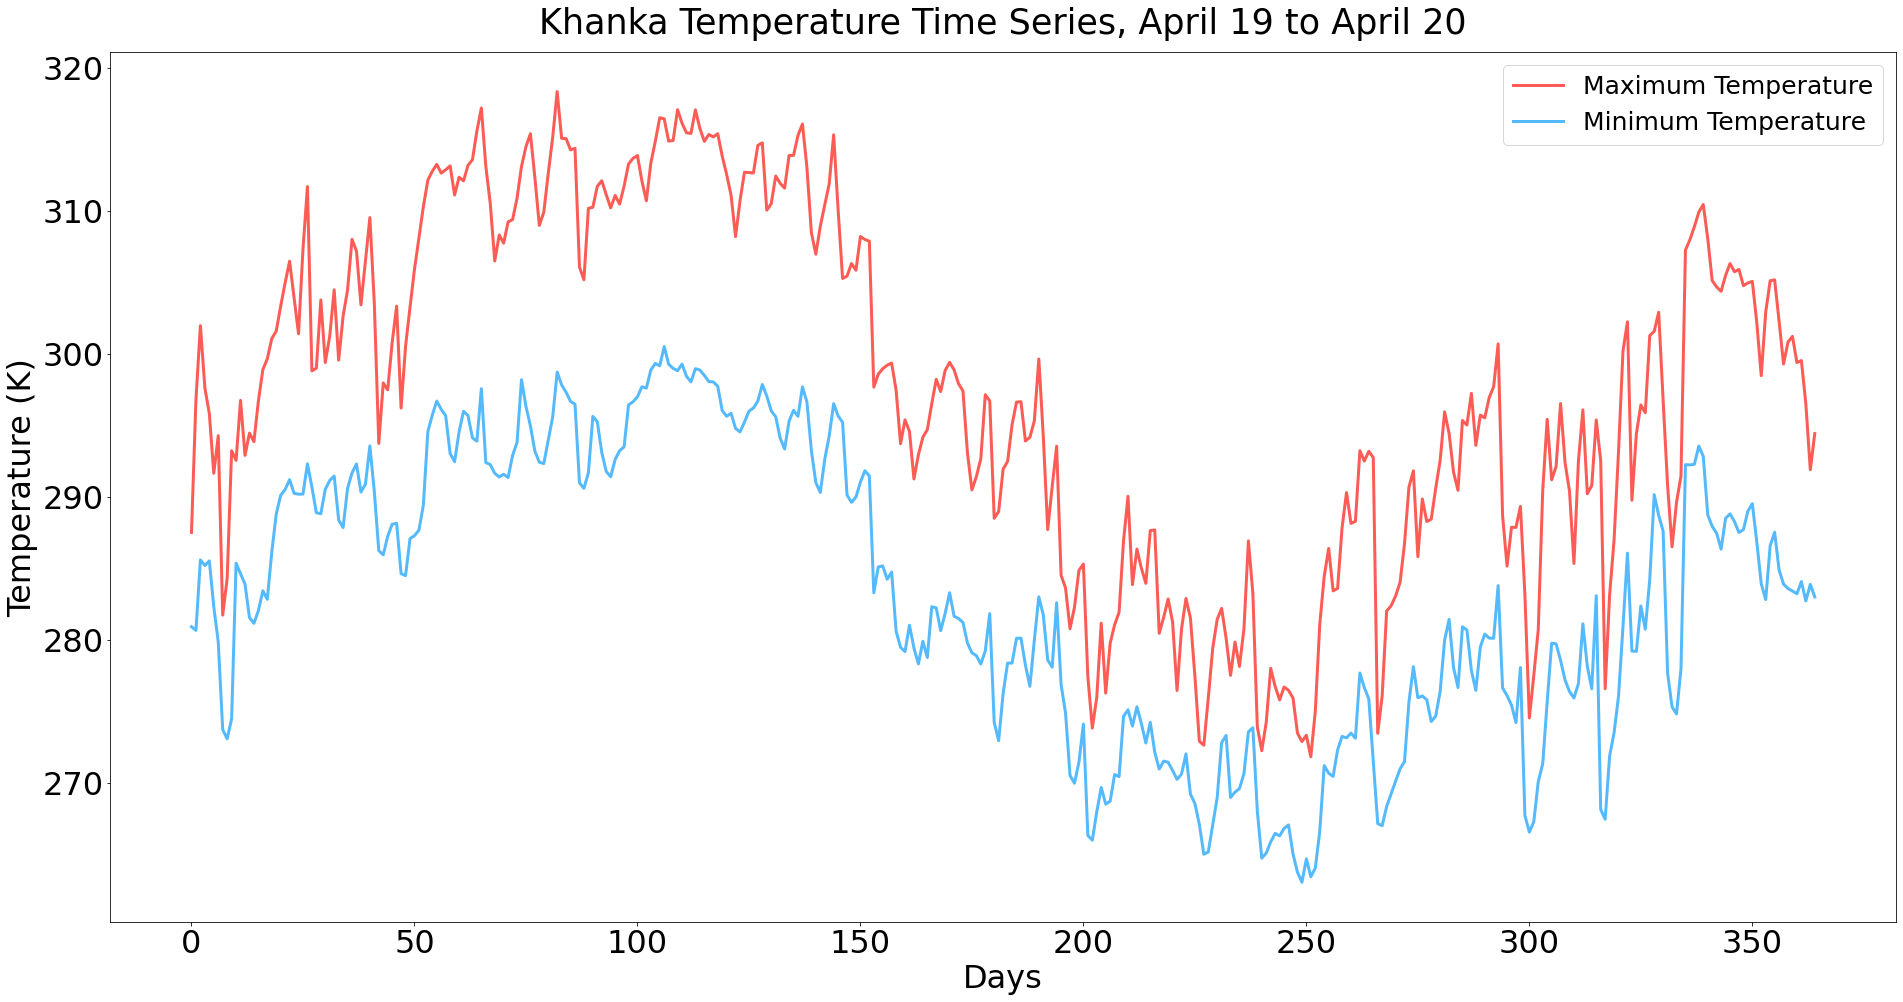

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(32,16))
plt.plot(T_array[0],
         '#FC5C55',
        linewidth=3)
plt.plot(T_array[1],
         '#55BAFC',
        linewidth=3)

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

plt.xlabel('Days',
           fontsize=32)
plt.ylabel('Temperature (K)',
           fontsize=32)

plt.legend(['Maximum Temperature', "Minimum Temperature"],
           fontsize=25)

plt.title('Khanka Temperature Time Series, April ''19 to April ''20',
         fontsize= 35,
         pad = 18)

# Diurnal Range 


- For the region selected, show on a map the diurnal ranges
- Should see patterns 

In [13]:
import pandas as pd

d_range_kha = T_array[0]-T_array[1]
kha_range_df = pd.DataFrame(d_range_kha, columns = ['Diurnal Range'])
kha_range_df.describe()

,Diurnal Range
count,365.000000
mean,14.467528
std,3.373865
min,5.812775
25%,12.134186
50%,15.027893
75%,17.014709
max,24.380035


Text(0, 0.5, 'Day Count')

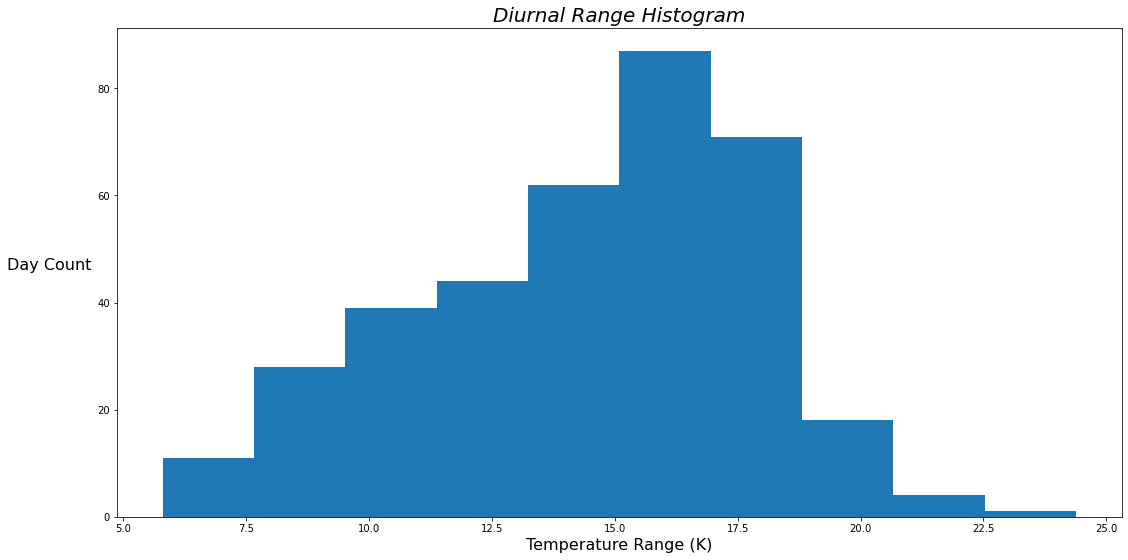

In [14]:
fig2 = plt.figure(figsize=(18,9))
plt.hist(d_range_kha)
plt.title('Diurnal Range Histogram',
         fontstyle='oblique',
         fontsize=20)
plt.xlabel('Temperature Range (K)', fontsize=16)
plt.ylabel('Day Count',
           rotation=0,
           labelpad=48,
           fontsize=16)

In [15]:
df = pd.DataFrame(T_array.T, columns = ['Tmax','Tmin'])

In [16]:
df.describe()

,Tmax,Tmin
count,365.000000,365.000000
mean,297.651855,283.184357
std,12.219290,9.940809
min,271.839600,263.069580
25%,288.515869,275.332458
50%,297.468018,283.022278
75%,308.487366,291.838654
max,318.341522,300.516266


## Diurnal Range Data

The data was collected as individual files for every day of the period year. The first step is to construct a single data set with the data for an entire year.

- Options

    * Create a Tmax and a Tmin data set, then calculate range for each gridpoint
    * Create a Trange data set looping through each file.
    

In [17]:
data0 = Dataset(files[0]).variables

ranges = data0['T2MMAX'][0] - data0['T2MMIN'][0]

ranges = ranges.reshape(1,28,33)

np.shape(ranges)

for file in files:
    
    if file == files[0]:
        continue
    
    data = Dataset(file).variables
    
    new_ranges = data['T2MMAX'][0] - data['T2MMIN'][0]
    
    #print(np.shape(ranges), np.shape(new_ranges))
    
    ranges = np.concatenate((ranges, new_ranges.reshape(1,28,33)), axis=0)
    
np.shape(ranges)

(365, 28, 33)

In [18]:
np.mean(ranges, axis=0)

masked_array(
  data=[[15.848308 , 15.704217 , 16.15769  , 16.641926 , 16.92394  ,
         16.728039 , 15.613488 , 15.463996 , 15.497777 , 15.514658 ,
         16.797392 , 16.120491 , 16.335335 , 16.363823 , 15.34174  ,
         15.458251 , 16.489946 , 16.550755 , 14.064403 , 13.866426 ,
         15.000635 , 15.637224 , 15.574034 , 15.629129 , 14.938032 ,
         13.350349 , 13.097484 , 13.357509 , 12.417455 , 11.957088 ,
         11.038326 , 11.105169 , 10.963262 ],
        [15.609352 , 16.059805 , 15.915063 , 16.152332 , 16.055656 ,
         16.298323 , 15.500359 , 15.105498 , 15.56223  , 16.3262   ,
         16.123386 , 14.937577 , 15.121093 , 15.789471 , 16.490643 ,
         15.681405 , 16.114367 , 16.715147 , 15.871321 , 13.680651 ,
         14.346743 , 15.588412 , 15.61169  , 15.5689335, 15.162369 ,
         13.256414 , 12.812679 , 12.918189 , 11.90444  , 11.601196 ,
         12.121935 , 11.401115 , 10.794783 ],
        [15.2779875, 15.933454 , 15.562861 , 15.621498 , 15.641746

## Average Diurnal Range Plot



In [19]:
from cartopy import crs as ccrs
from cartopy import feature as cfeature

lon, lat = np.meshgrid(lons, lats)

In [20]:
points = ranges.mean(axis=0)
np.shape(points)

(28, 33)

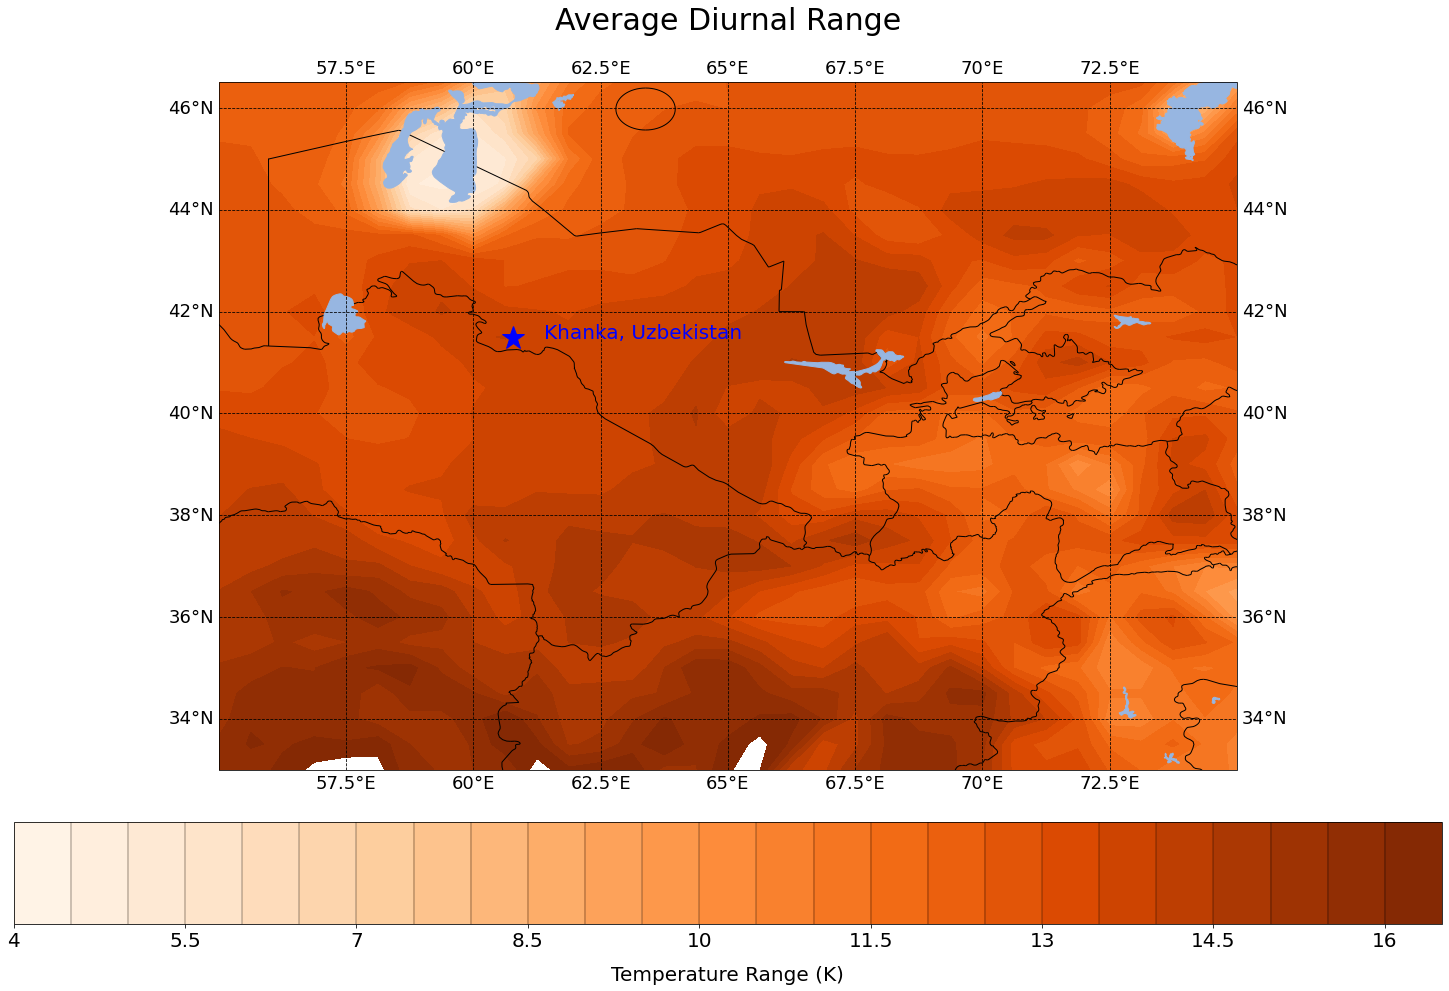

In [21]:
from matplotlib.ticker import FormatStrFormatter

#______________________________________Map_______________________________________

fig1 = plt.figure(figsize=(32,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((min(lons),max(lons),min(lats),max(lats)))
ax.coastlines(resolution='110m',
              linewidth=1)

#____________________________________Gridlines____________________________________

gl = ax.gridlines(linestyle='--', color='black', draw_labels=True)
gl.xlabel_style = {'size': 18, 'color': 'Black'}
gl.ylabel_style = {'size': 18, 'color': 'Black'}


#___________________________________Map Features__________________________________

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)

#________________________________________Data_____________________________________

clevs = np.arange(4, 17, 0.5)
plt.contourf(lon, lat, points, clevs, transform=ccrs.PlateCarree(), cmap=plt.cm.Oranges)
plt.plot(kha_lon, kha_lat,
         color='blue',
         linewidth=0,
         marker='*',
         markersize=24, 
         transform=ccrs.PlateCarree())

#________________________________________Text______________________________________

plt.text(kha_lon + 4.5, kha_lat, 'Khanka, Uzbekistan',
         horizontalalignment='right',
         fontsize = 20,
         color='blue',
         transform=ccrs.Geodetic())
plt.title('Average Diurnal Range', size=30, pad=30)




#______________________________________Colorbar_______________________________________
cb = plt.colorbar(ax=ax,
                  orientation="horizontal",
                  pad=0.06, aspect=14, shrink=0.8,
                 format="%.3f",
                 drawedges=True)
cb.set_label('Temperature Range (K)',size=20,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=20, rotation=0)
cb.ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))

# Monthly Mean Bar Graph (Tmax)

In [68]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(start="2020-04-01", periods=365)

df_tmax = pd.DataFrame({"Date": datelist,
                       "Tmax": T_array[0]})

df_tmax.head()

,Date,Tmax
0,2020-04-01,287.526794
1,2020-04-02,296.812256
2,2020-04-03,301.980804
3,2020-04-04,297.634338
4,2020-04-05,295.831909


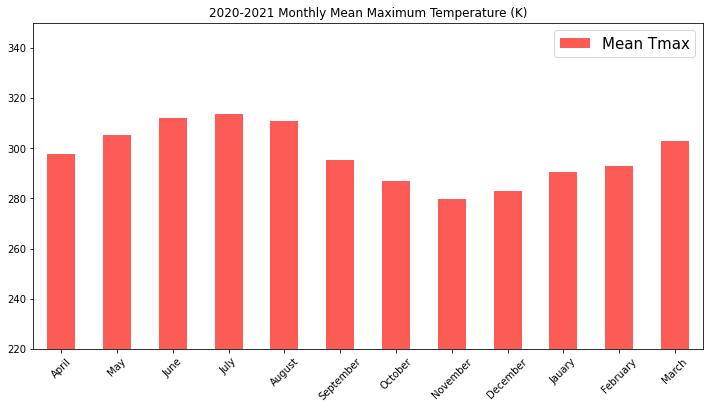

In [23]:
df_bar = df_tmax.groupby(pd.Grouper(key="Date",freq='M')).mean()
   
df_bar.columns = ['Mean Tmax']
df_bar.index = ['April','May','June','July','August','September',
             'October','November','December','Jauary','February','March']
    
df_bar.plot(kind='bar',
            color = '#FC5C55',
           ylim=(220,350),
           figsize=(12,6),
           title='2020-2021 Monthly Mean Maximum Temperature (K)')
plt.xticks(rotation=45)
plt.legend(fontsize=15)

# Daily Tmax Distribution

- (two histograms, different bin widths)

In [24]:
df_T = pd.DataFrame(T_array.T, columns=['Tmax','Tmin'])
df_T.describe()

,Tmax,Tmin
count,365.000000,365.000000
mean,297.651855,283.184357
std,12.219290,9.940809
min,271.839600,263.069580
25%,288.515869,275.332458
50%,297.468018,283.022278
75%,308.487366,291.838654
max,318.341522,300.516266


## Freedman-Diaconis Bin Selection


- $\text{Bin width}=2*\frac{IQR(x)}{\sqrt[3]{n}}$

- $\text{Bins}=\frac{IQR(x)}{\text{Bin Width}}$

In [25]:
h = 2*(df_T.Tmax.max()-df_T.Tmax.min())*(df_T.count()[0]**(-1/3))
h

13.013774683121012

In [26]:
bins = (df_T.Tmax.max()-df_T.Tmax.min())/h
bins

3.573284749407511

## Histogram Plot

(array([ 2.,  1.,  2.,  3.,  2.,  2.,  1.,  0.,  4.,  4.,  3.,  0.,  4.,
         2.,  0.,  0.,  1.,  3.,  1.,  6.,  5.,  3.,  3.,  2.,  5.,  3.,
         3.,  2.,  4.,  1.,  1.,  4.,  3.,  1.,  6.,  5.,  2.,  1.,  3.,
         4.,  8.,  2.,  5.,  3.,  9.,  5.,  4.,  4.,  9.,  3.,  6.,  4.,
         3., 11.,  4.,  5.,  3.,  2.,  7.,  9.,  0.,  2.,  4.,  6.,  1.,
         3.,  3.,  4.,  2.,  2.,  4.,  8.,  3.,  4.,  5.,  1.,  3.,  7.,
         4.,  3.,  2.,  3.,  7.,  7.,  4.,  4.,  6.,  9.,  7.,  5.,  4.,
         4.,  7.,  9.,  2.,  3.,  1.,  3.,  0.,  1.]),
 array([271.8396 , 272.30463, 272.76965, 273.23465, 273.69968, 274.1647 ,
        274.6297 , 275.09473, 275.55975, 276.02478, 276.4898 , 276.9548 ,
        277.41983, 277.88486, 278.34985, 278.81488, 279.2799 , 279.74493,
        280.20996, 280.67496, 281.13998, 281.605  , 282.07   , 282.53503,
        283.00006, 283.4651 , 283.9301 , 284.3951 , 284.86014, 285.32516,
        285.79016, 286.2552 , 286.7202 , 287.18524, 287.65027, 2

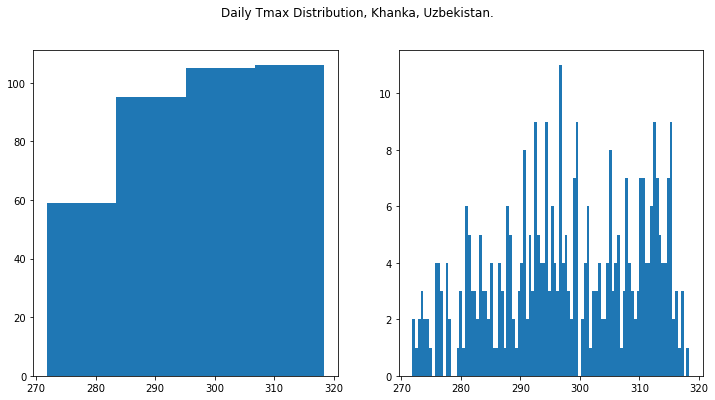

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

fig.suptitle('Daily Tmax Distribution, Khanka, Uzbekistan.')
             
ax1.hist(T_array[0], bins=4) #Freedman-Diaconis
ax2.hist(T_array[0], bins=100) #Empirical

### Plot Histogram Values

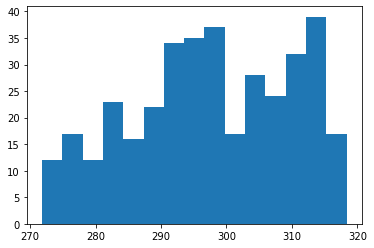

In [45]:
a = plt.hist(T_array[0], bins=15)

In [46]:
b = a[0]
c = [np.mean([i, i+1]) for i in a[1][:-1]]

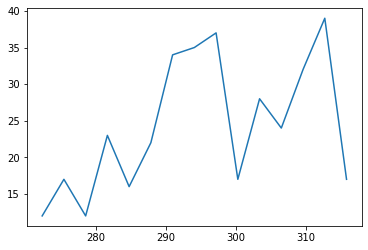

In [47]:
plt.plot(c,b)

# Days Below Freezing

- Bar Graph (number of days each month that are below freezing) 

In [67]:
#df_tmax.Tmax = df_tmax.Tmax -273.5

df_tmax


,Date,Tmax,5 Day Moving Average,11 Day Moving Average
0,2020-04-01,287.526794,292.231287,NaN
1,2020-04-02,296.812256,289.566681,NaN
2,2020-04-03,301.980804,289.047473,NaN
3,2020-04-04,297.634338,289.228815,NaN
4,2020-04-05,295.831909,289.721484,NaN
...,...,...,...,...
360,2021-03-27,299.399597,NaN,302.001365
361,2021-03-28,299.538300,NaN,301.498183
362,2021-03-29,296.514618,NaN,300.981828
363,2021-03-30,291.903320,NaN,300.384017


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'April'),
  Text(1, 0, 'September'),
  Text(2, 0, 'October'),
  Text(3, 0, 'November'),
  Text(4, 0, 'December'),
  Text(5, 0, 'January'),
  Text(6, 0, 'February')])

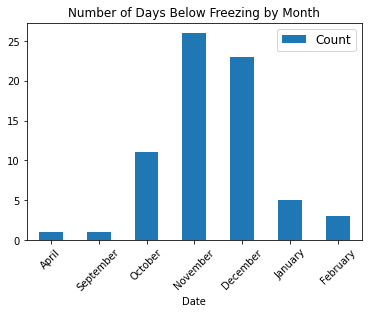

In [30]:
import calendar

#Create Tmin DataFrame
df_tmin = pd.DataFrame({"Date": datelist,
                       "Tmin": T_array[1]})

#Convert Kelvin to Celsius
df_tmin['Tmin'] = df_tmin['Tmin'] - 273.15 

#Selection of Days Below Freezing
df_tmin = df_tmin[df_tmin.Tmin<0]

#Extract Month Number from Timestamp
df_tmin['Date'] = pd.DatetimeIndex(df_tmin['Date']).month

#Convert Month Number to Month Name
df_tmin['Date'] = df_tmin['Date'].apply(lambda x: calendar.month_name[x])

#Count the number of days below freezing grouped by Month
df_tmin = df_tmin.groupby("Date",sort=False).count()

#Plot
df_tmin.plot(kind='bar')
plt.legend(['Count'], fontsize=12, loc=1)
plt.title('Number of Days Below Freezing by Month')
plt.xticks(rotation=45)

In [31]:
#Create Tmin DataFrame
df_tmin = pd.DataFrame({"Date": datelist,
                       "Tmin": T_array[1]})

#Convert Kelvin to Celsius
df_tmin['Tmin'] = df_tmin['Tmin'] - 273.15 

#Selection of Days Below Freezing
df_tmin = df_tmin[df_tmin.Tmin<0]



# Tmax Moving Average

- Three plots (time series, 2 moving averages)
- Moving Average (5 Day, 11 Day) Tmax

In [82]:
df_tmax['5 Day Moving Average'] = df_tmax.rolling(window=5).mean()
df_tmax['11 Day Moving Average'] = df_tmax.Tmax.rolling(window=11).mean()
print(df_tmax.head())
print(df_tmax.tail())

        Date        Tmax  5 Day Moving Average  11 Day Moving Average
0 2020-04-01  287.526794                   NaN                    NaN
1 2020-04-02  296.812256                   NaN                    NaN
2 2020-04-03  301.980804                   NaN                    NaN
3 2020-04-04  297.634338                   NaN                    NaN
4 2020-04-05  295.831909             295.95722                    NaN
          Date        Tmax  5 Day Moving Average  11 Day Moving Average
360 2021-03-27  299.399597            300.610352             302.001365
361 2021-03-28  299.538300            300.060571             301.498183
362 2021-03-29  296.514618            299.503033             300.981828
363 2021-03-30  291.903320            297.717194             300.384017
364 2021-03-31  294.437439            296.358655             299.612887


## Plotting Time Series and Moving Averages

(array([260., 270., 280., 290., 300., 310., 320., 330.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

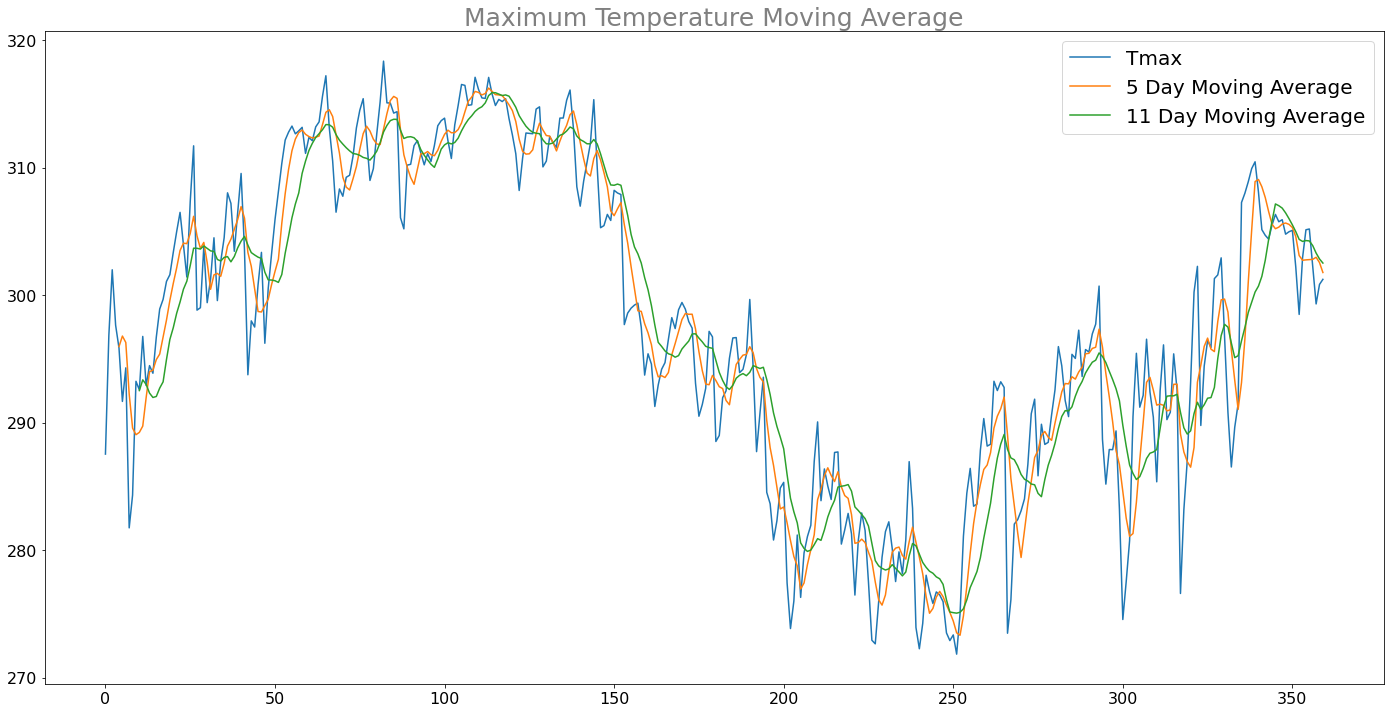

In [83]:
fig3 = plt.figure(figsize=(24,12))

days=360

plt.plot(df_tmax['Tmax'][:days])
plt.plot(df_tmax['5 Day Moving Average'][:days])
plt.plot(df_tmax['11 Day Moving Average'][:days])
plt.legend(['Tmax','5 Day Moving Average','11 Day Moving Average'], fontsize=20)
plt.title('Maximum Temperature Moving Average', fontsize=25, color='Gray')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

## Centering Moving Average and Time Series Plots


- pd.DataFrame().shift(periods=int)

In [84]:
df_tmax.head()

,Date,Tmax,5 Day Moving Average,11 Day Moving Average
0,2020-04-01,287.526794,NaN,NaN
1,2020-04-02,296.812256,NaN,NaN
2,2020-04-03,301.980804,NaN,NaN
3,2020-04-04,297.634338,NaN,NaN
4,2020-04-05,295.831909,295.95722,NaN


In [87]:
df_tmax['5 Day Moving Average'] = df_tmax.rolling(window=5).mean().shift(periods=-2)
df_tmax['11 Day Moving Average'] = df_tmax.Tmax.rolling(window=11).mean().shift(periods=-5)
print(df_tmax.head())
print(df_tmax.tail())

        Date        Tmax  5 Day Moving Average  11 Day Moving Average
0 2020-04-01  287.526794                   NaN                    NaN
1 2020-04-02  296.812256                   NaN                    NaN
2 2020-04-03  301.980804            295.957220                    NaN
3 2020-04-04  297.634338            296.783392                    NaN
4 2020-04-05  295.831909            296.278973                    NaN
          Date        Tmax  5 Day Moving Average  11 Day Moving Average
360 2021-03-27  299.399597            299.503033                    NaN
361 2021-03-28  299.538300            297.717194                    NaN
362 2021-03-29  296.514618            296.358655                    NaN
363 2021-03-30  291.903320                   NaN                    NaN
364 2021-03-31  294.437439                   NaN                    NaN


(array([260., 270., 280., 290., 300., 310., 320., 330.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

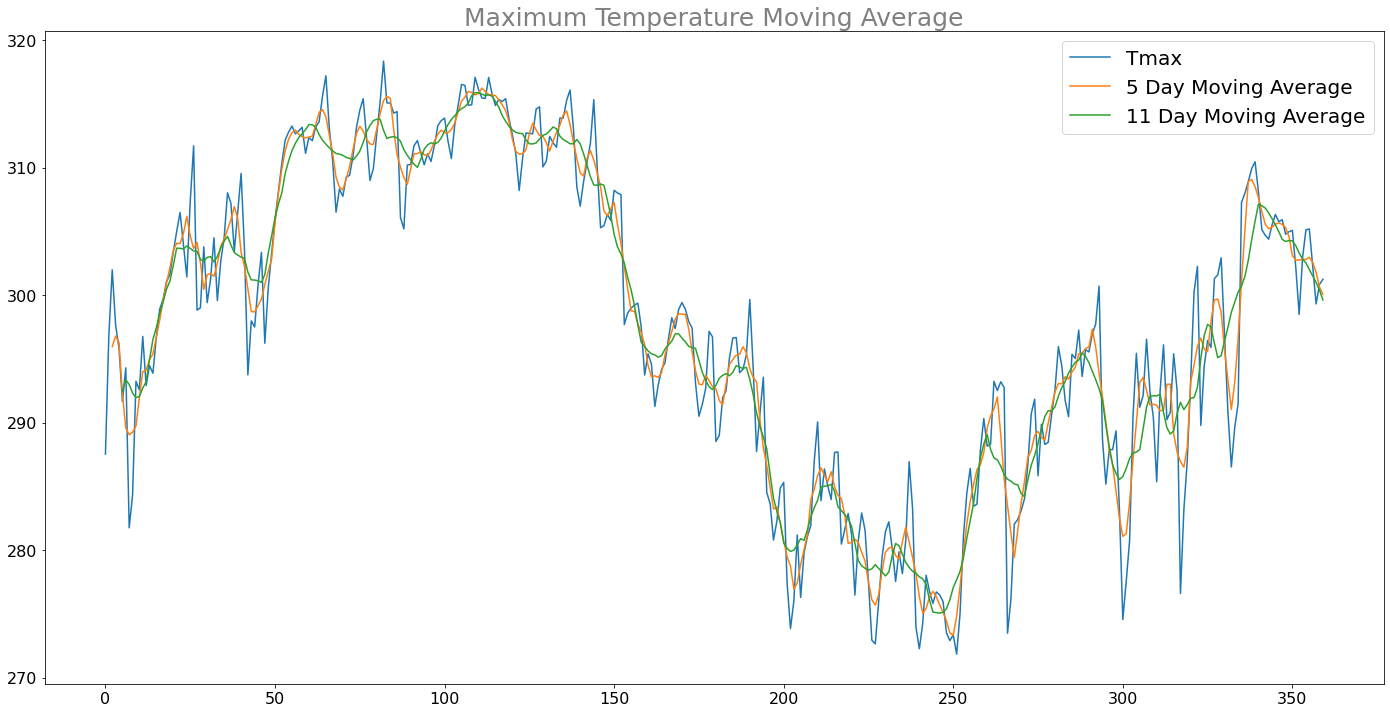

In [88]:
fig3 = plt.figure(figsize=(24,12))

days=360

plt.plot(df_tmax['Tmax'][:days])
plt.plot(df_tmax['5 Day Moving Average'][:days])
plt.plot(df_tmax['11 Day Moving Average'][:days])
plt.legend(['Tmax','5 Day Moving Average','11 Day Moving Average'], fontsize=20)
plt.title('Maximum Temperature Moving Average', fontsize=25, color='Gray')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Bar Graph

- Average July Tmax - Average January Tmax on a MAP

In [91]:
df_tmax

,Date,Tmax,5 Day Moving Average,11 Day Moving Average
0,2020-04-01,287.526794,NaN,NaN
1,2020-04-02,296.812256,NaN,NaN
2,2020-04-03,301.980804,295.957220,NaN
3,2020-04-04,297.634338,296.783392,NaN
4,2020-04-05,295.831909,296.278973,NaN
...,...,...,...,...
360,2021-03-27,299.399597,299.503033,NaN
361,2021-03-28,299.538300,297.717194,NaN
362,2021-03-29,296.514618,296.358655,NaN
363,2021-03-30,291.903320,NaN,NaN


,Tmax,5 Day Moving Average,11 Day Moving Average
Date,,,
2020-04-30,297.809814,298.020176,298.505471
2020-05-31,305.419861,305.471908,305.546282
2020-06-30,311.937744,311.959747,311.997117
2020-07-31,313.812164,313.731694,313.603889
2020-08-31,310.774384,310.631140,310.470997
2020-09-30,295.455872,295.702146,296.015057
2020-10-31,286.819794,286.768498,286.640624
2020-11-30,279.705902,279.690104,279.757045
2020-12-31,282.814056,282.751794,282.767307


# New Tasks

## Histogram as Line Plot

[Plot Histogram Values](#Plot-Histogram-Values)

## Moving Averages Centered Appropriately.

[Centering Moving Average and Time Series Plots](#Centering-Moving-Average-and-Time-Series-Plots)

## (July - Dec) Tmax on Map

In [103]:
dec = files[335-121:335-90]
july = files[91:122]

In [123]:
day_1 = Dataset(july[0])
print(np.shape(day_1.variables['T2MMAX']), type(day_1.variables['T2MMAX'][0]))

(1, 28, 33) <class 'numpy.ma.core.MaskedArray'>


In [127]:
jul_arr = Dataset(july[0]).variables['T2MMAX']

for day in july:
    
    if day == july[0]:
        continue
    
    jul_arr = np.concatenate((jul_arr, Dataset(day).variables['T2MMAX']))

In [128]:
np.shape(jul_arr)

(31, 28, 33)

In [136]:
jul_arr = jul_arr.mean(axis=0)

In [129]:
dec_arr = Dataset(dec[0]).variables['T2MMAX']

for day in dec:
    
    if day == dec[0]:
        continue
    
    dec_arr = np.concatenate((dec_arr, Dataset(day).variables['T2MMAX']))

In [134]:
np.shape(dec_arr)

(31, 28, 33)

In [135]:
dec_arr = dec_arr.mean(axis=0)

In [137]:
diff_arr = jul_arr - dec_arr
np.shape(diff_arr)

(28, 33)

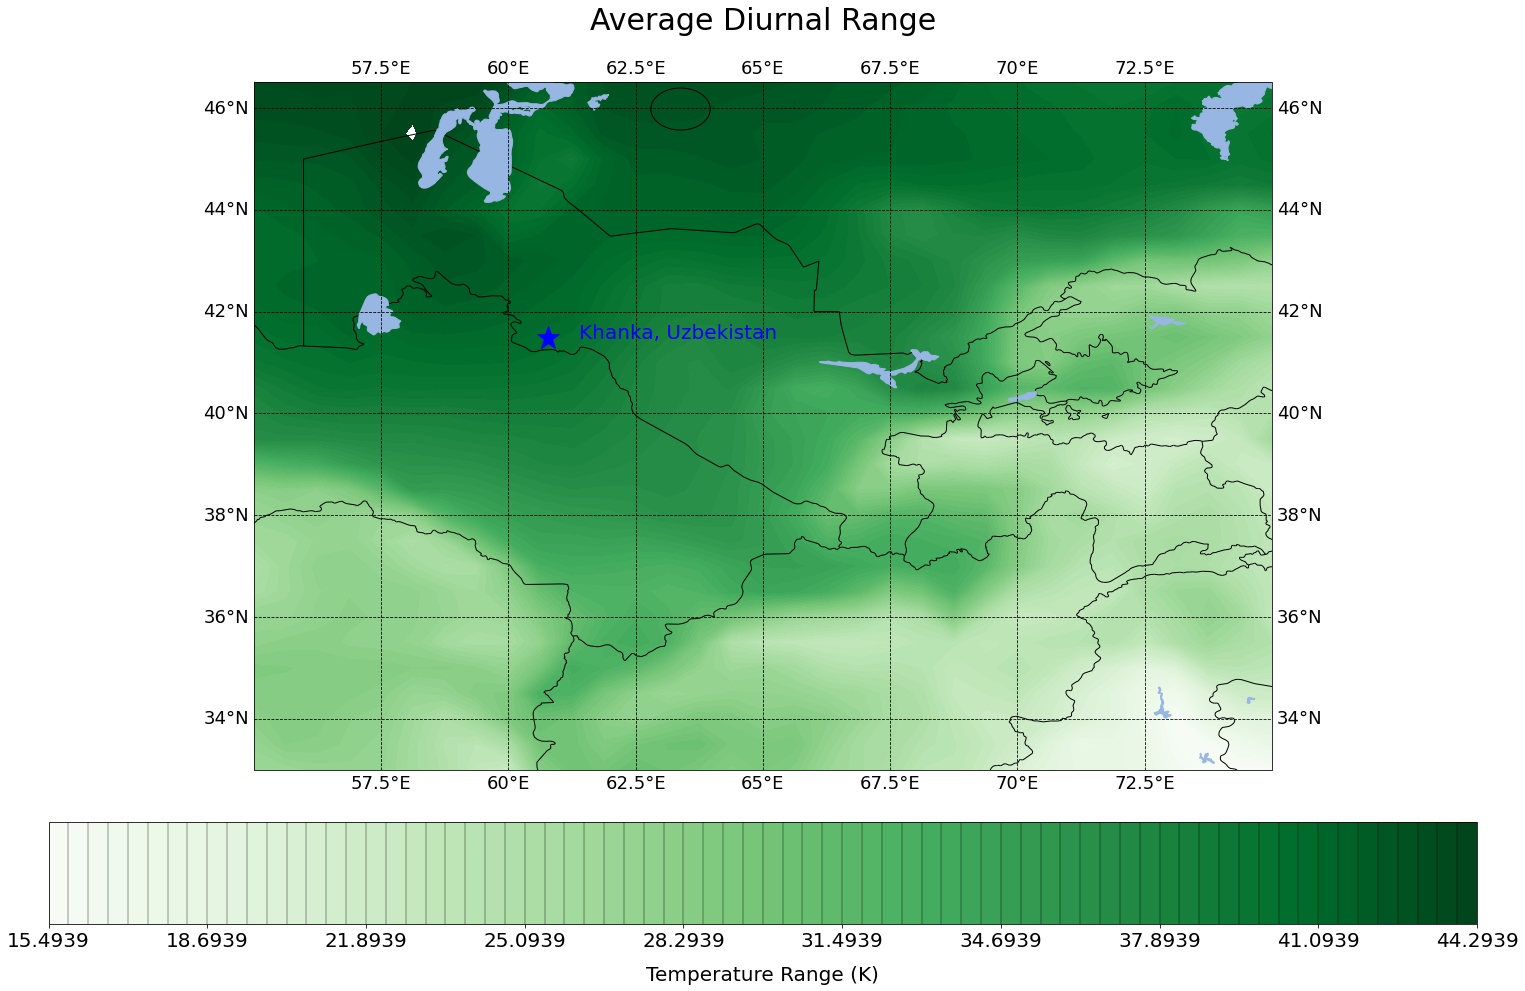

In [151]:

#______________________________________Map_______________________________________

fig1 = plt.figure(figsize=(32,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((min(lons),max(lons),min(lats),max(lats)))
ax.coastlines(resolution='110m',
              linewidth=1)

#____________________________________Gridlines____________________________________

gl = ax.gridlines(linestyle='--', color='black', draw_labels=True)
gl.xlabel_style = {'size': 18, 'color': 'Black'}
gl.ylabel_style = {'size': 18, 'color': 'Black'}


#___________________________________Map Features__________________________________

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)

#________________________________________Data_____________________________________

clevs = np.arange(diff_arr.min(), diff_arr.max(), 0.4)
plt.contourf(lon, lat, diff_arr, clevs, transform=ccrs.PlateCarree(), cmap=plt.cm.Greens)
plt.plot(kha_lon, kha_lat,
         color='blue',
         linewidth=0,
         marker='*',
         markersize=24, 
         transform=ccrs.PlateCarree())

#________________________________________Text______________________________________

plt.text(kha_lon + 4.5, kha_lat, 'Khanka, Uzbekistan',
         horizontalalignment='right',
         fontsize = 20,
         color='blue',
         transform=ccrs.Geodetic())
plt.title('Average Diurnal Range', size=30, pad=30)




#______________________________________Colorbar_______________________________________
cb = plt.colorbar(ax=ax,
                  orientation="horizontal",
                  pad=0.06, aspect=14, shrink=0.8,
                 format="%.3f",
                 drawedges=True)
cb.set_label('Temperature Range (K)',size=20,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=20, rotation=0)
cb.ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))

## Conditional Map

### Mean Max Temp Map [july]

### Number of Frost Days Map [Dec]

### Number of Days > 35C in July Map

### Grand Product

- Conditional Map

    * 8 Categories 